In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/customer/customercon_dataset2_9.xlsx')
data.head()

,year,industry,dateoflisting,age,staff,roa,asset,currency,revgrow,revenue,...,freight,internet,lasset,cashassetrate,labpro,topfivesalesamount,customerconcentration,supplychainconcentration,cloudcomputingtech,digitaltechapplication
0,2012,10,33267,21,31019,6.4676,3.788016e+11,1.750611e+10,43.6505,1.031162e+11,...,0.0082,1.5724,26.660278,0.046214,3324293.0,1.900515e+09,1.85,0.93,0.0,0.0
1,2013,10,33267,22,35330,5.8383,4.792053e+11,-8.116075e+09,31.3263,1.463880e+11,...,0.0072,1.3945,26.895395,-0.016937,4143447.5,2.823094e+09,2.09,1.05,0.0,2.0
2,2014,10,33267,23,40647,5.2390,5.084088e+11,1.864917e+10,8.1002,1.955491e+11,...,0.0063,1.3352,26.954552,0.036681,4810912.0,1.210000e+09,0.83,1.92,0.0,12.0
3,2015,10,33267,24,42300,6.1106,6.112956e+11,-9.905699e+09,33.5828,2.404772e+11,...,0.0070,1.8919,27.138847,-0.016204,5685041.0,2.697000e+09,2.98,1.99,0.0,2.0
4,2016,10,33267,25,58280,5.5590,8.306742e+11,2.774239e+10,22.9754,2.428971e+11,...,0.0062,1.6416,27.445503,0.033397,4167761.0,2.140000e+09,0.90,1.49,1.0,1.0


In [ ]:
X = data.drop(['customerconcentration'], axis=1)
y = data['customerconcentration']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)


       year  industry  dateoflisting  age  staff      roa         asset  \
0      2012        10          33267   21  31019   6.4676  3.788016e+11   
1      2013        10          33267   22  35330   5.8383  4.792053e+11   
2      2014        10          33267   23  40647   5.2390  5.084088e+11   
3      2015        10          33267   24  42300   6.1106  6.112956e+11   
4      2016        10          33267   25  58280   5.5590  8.306742e+11   
...     ...       ...            ...  ...    ...      ...           ...   
26796  2020         2          44666   -2    248  34.3745  1.322820e+08   
26797  2018         2          44721   -4    386  12.0381  1.496040e+08   
26798  2019         2          44721   -3    413  17.2753  1.758760e+08   
26799  2020         2          44721   -2    473  14.4213  2.209479e+08   
26800  2021         2          44721   -1    537   8.9945  3.533007e+08   

           currency  revgrow       revenue   finance   freight  internet  \
0      1.750611e+10  43

In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Cross-Validation RMSE Scores: [8.54219064 8.42199234 8.0249641  8.31105345 7.83848699]
Mean Cross-Validation RMSE: 8.227737505720423


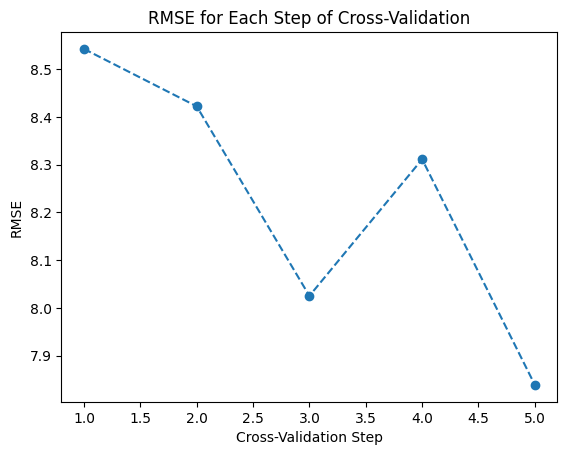

In [ ]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 66.84441336943155
Mean Absolute Error: 5.465814779689317


In [ ]:
# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 67.09469337141932
Validation Mean Absolute Error: 5.487797762376706


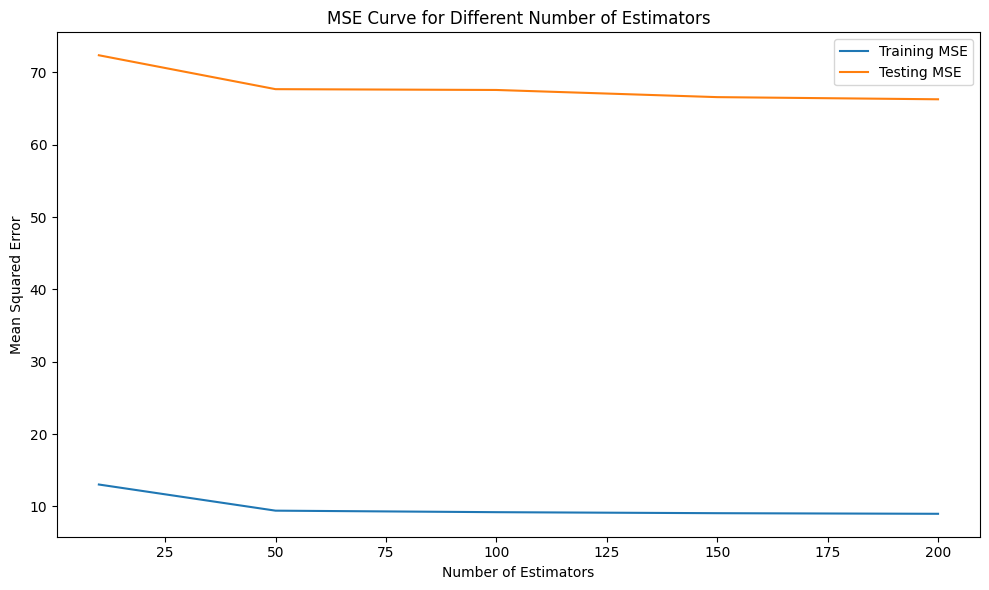

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


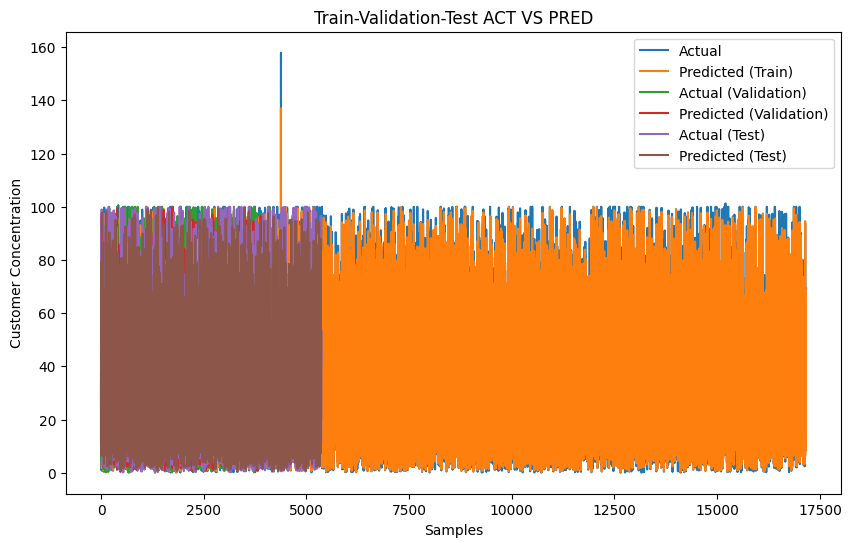

In [ ]:
# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


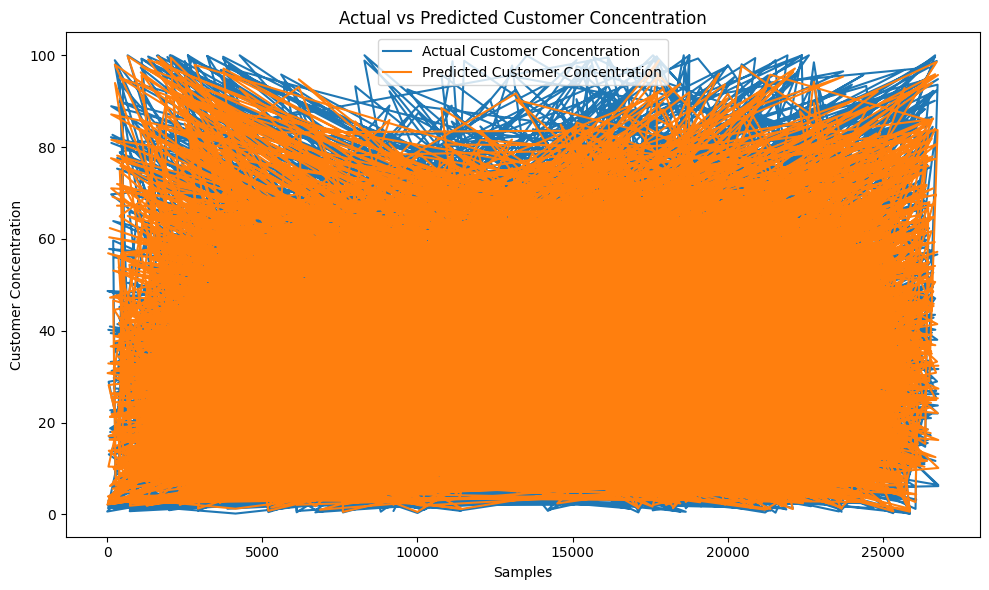

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


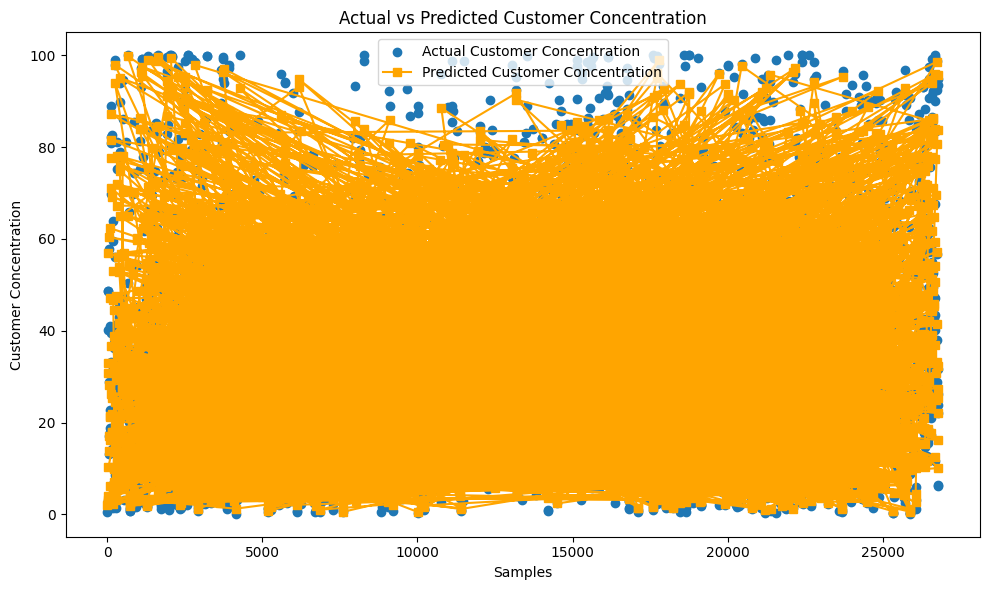

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with 100 Estimators:
Mean Absolute Error (MAE): 5.48
Mean Squared Error (MSE): 67.41
Root Mean Squared Error (RMSE): 8.21
R-squared (R2): 0.87
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 27.02%


**Proposed ACO based RFR**

Cross-Validation RMSE Scores: [8.44976763 8.42735224 8.02007245 8.35287344 7.76111375]
Mean Cross-Validation RMSE: 8.202235903480863


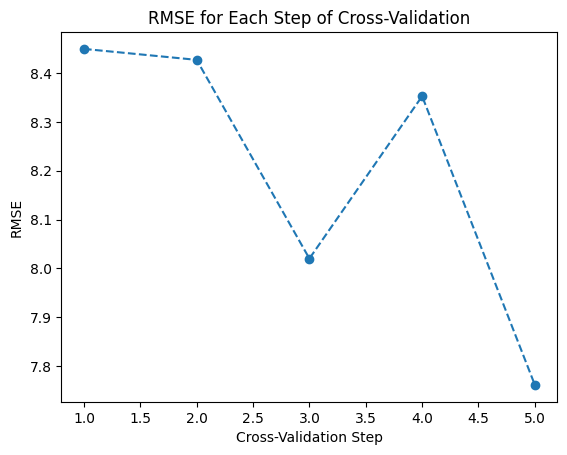

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200],  # n_estimators
    [10, 20, 30, None],   # max_depth
    [2, 5, 10]            # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=1, n_best=3, n_iterations=10, decay=0.95)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
rf_regressor = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
rf_regressor.fit(X_train, y_train)

# Perform cross-validation and calculate RMSE scores
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


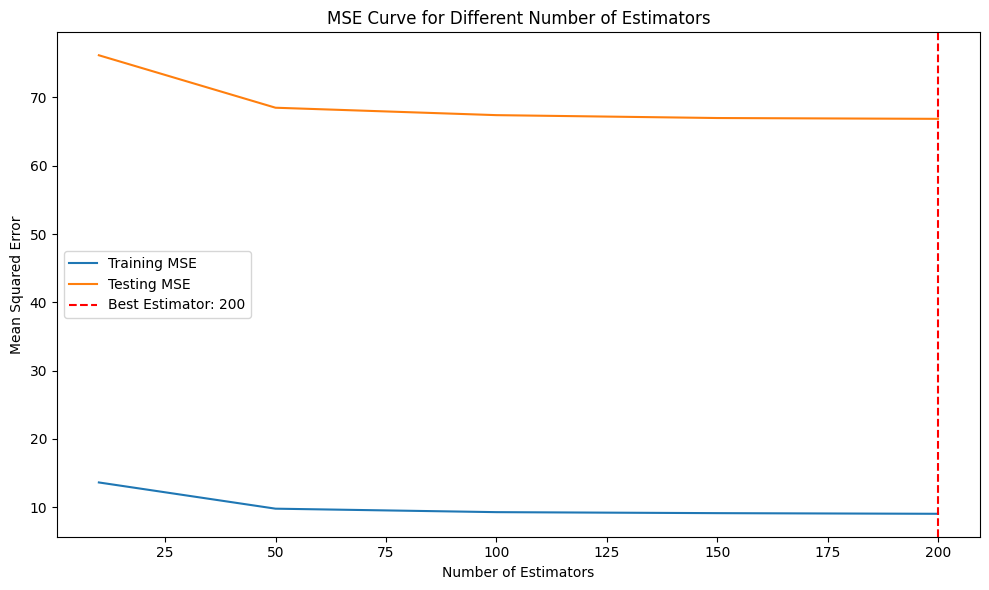

Best Number of Estimators: 200
Best Cross-Validation MSE: 67.16859714736813


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = np.inf  # We aim to minimize the error, hence start with infinity

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(n_estimators=params[0], random_state=42)
                score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
                all_scores.append(score)
                all_params.append(params)

                if score < best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0])
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1

        return best_params, best_score

# Define the search space for n_estimators
param_space = [
    [10, 50, 100, 150, 200]  # n_estimators
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=1, n_best=3, n_iterations=5, decay=0.95)
best_params, best_score = aco.optimize(param_space, X_train, y_train)

# Extract the best number of estimators
best_n_estimators = best_params[0]

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Evaluate the model performance for different n_estimators values
for n in param_space[0]:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(param_space[0], train_errors, label='Training MSE')
plt.plot(param_space[0], test_errors, label='Testing MSE')
plt.axvline(best_n_estimators, color='r', linestyle='--', label=f'Best Estimator: {best_n_estimators}')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Best Cross-Validation MSE: {best_score}")


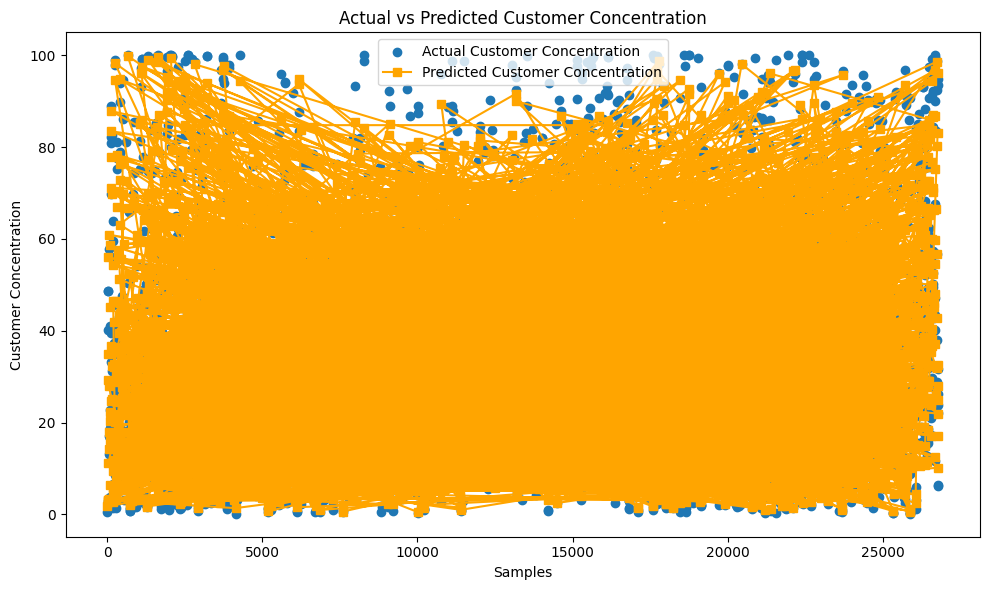

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Use the best hyperparameters found by ACO
best_n_estimators = best_params[0]

# Train the Random Forest Regressor using the best hyperparameters
rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Create a DataFrame with actual and predicted Customer Concentration values
customer_concentration_comparison = pd.DataFrame({
    'Actual Customer Concentration': y_test,
    'Predicted Customer Concentration': y_pred
})

# Plot the actual versus predicted Customer Concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(customer_concentration_comparison.index, customer_concentration_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(customer_concentration_comparison.index, customer_concentration_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Define Ant Colony Optimization (ACO) class
class AntColonyOptimizer:
    def __init__(self, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = None

    def initialize_pheromone(self, param_space):
        # Initialize pheromone matrix as a 2D array, with each row corresponding to a parameter
        self.pheromone = [np.ones(len(param)) for param in param_space]

    def select_hyperparameters(self, param_space):
        selected_params = []
        for i in range(len(param_space)):
            probs = self.pheromone[i] / self.pheromone[i].sum()  # Normalize pheromones to create a probability distribution
            selected_param = np.random.choice(param_space[i], p=probs)
            selected_params.append(selected_param)
        return selected_params

    def optimize(self, param_space, X_train, y_train):
        self.initialize_pheromone(param_space)

        best_params = None
        best_score = -np.inf

        for _ in range(self.n_iterations):
            all_scores = []
            all_params = []

            for _ in range(self.n_ants):
                params = self.select_hyperparameters(param_space)
                model = RandomForestRegressor(
                    n_estimators=params[0],
                    max_depth=params[1],
                    min_samples_split=params[2],
                    random_state=42
                )
                score = cross_val_score(model, X_train, y_train, cv=3).mean()
                all_scores.append(score)
                all_params.append(params)

                if score > best_score:
                    best_score = score
                    best_params = params

            # Pheromone update
            sorted_params = sorted(zip(all_scores, all_params), key=lambda x: x[0], reverse=True)
            for i in range(len(param_space)):
                self.pheromone[i] *= self.decay  # Apply decay to pheromone values
                for _, params in sorted_params[:self.n_best]:
                    selected_index = param_space[i].index(params[i])
                    self.pheromone[i][selected_index] += 1  # Increase pheromone level for successful params

        return best_params

# Hyperparameter search space
param_space = [
    [50, 100, 150, 200],  # n_estimators
    [10, 20, 30, None],   # max_depth
    [2, 5, 10]            # min_samples_split
]

# Initialize and run ACO
aco = AntColonyOptimizer(n_ants=1, n_best=3, n_iterations=5, decay=0.95)
best_params = aco.optimize(param_space, X_train, y_train)

# Train the Random Forest with the best parameters
forest_model = RandomForestRegressor(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    random_state=42
)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

print(f"\nRandom Forest Regressor Model with Optimized Estimators:")
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Random Forest Regressor Model with Optimized Estimators:
Best Hyperparameters: [200, 20, 2]
Mean Absolute Error (MAE): 5.48
Mean Squared Error (MSE): 67.01
Root Mean Squared Error (RMSE): 8.19
R-squared (R2): 0.87
Root Mean Squared Logarithmic Error (RMSLE): 0.05
Mean Absolute Percentage Error (MAPE): 26.84%


       Actual  Predicted
12723   34.10  36.902926
19067    8.40   8.274398
13430   28.60  27.122518
9163    13.23  15.869111
11522   16.66  17.810261
15604   75.51  61.335705
5711    65.34  64.730391
20759   69.11  77.196250
11004   21.15  22.600557
11660   21.53  20.795571


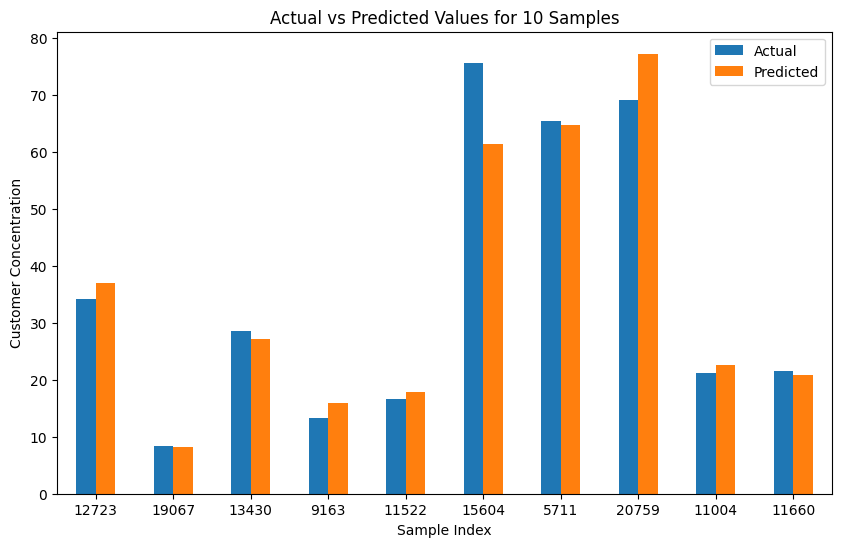

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# If you want to visualize it:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.xticks(rotation=0)
plt.show()


       Actual  Predicted
12723   34.10  36.902926
19067    8.40   8.274398
13430   28.60  27.122518
9163    13.23  15.869111
11522   16.66  17.810261
15604   75.51  61.335705
5711    65.34  64.730391
20759   69.11  77.196250
11004   21.15  22.600557
11660   21.53  20.795571


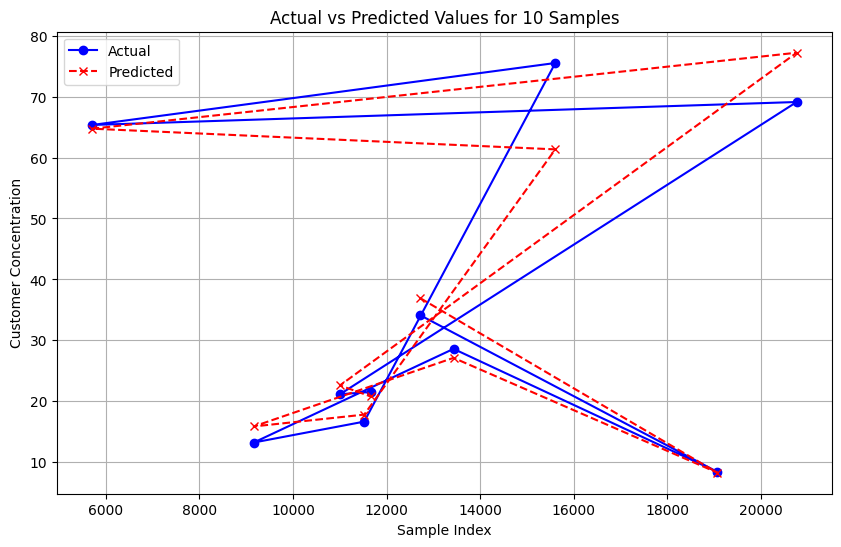

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plotting Actual values
plt.plot(comparison_df.index, comparison_df['Actual'], marker='o', linestyle='-', color='b', label='Actual')

# Plotting Predicted values
plt.plot(comparison_df.index, comparison_df['Predicted'], marker='x', linestyle='--', color='r', label='Predicted')

# Adding labels and title
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


       Actual  Predicted
12723   34.10  36.902926
19067    8.40   8.274398
13430   28.60  27.122518
9163    13.23  15.869111
11522   16.66  17.810261
15604   75.51  61.335705
5711    65.34  64.730391
20759   69.11  77.196250
11004   21.15  22.600557
11660   21.53  20.795571


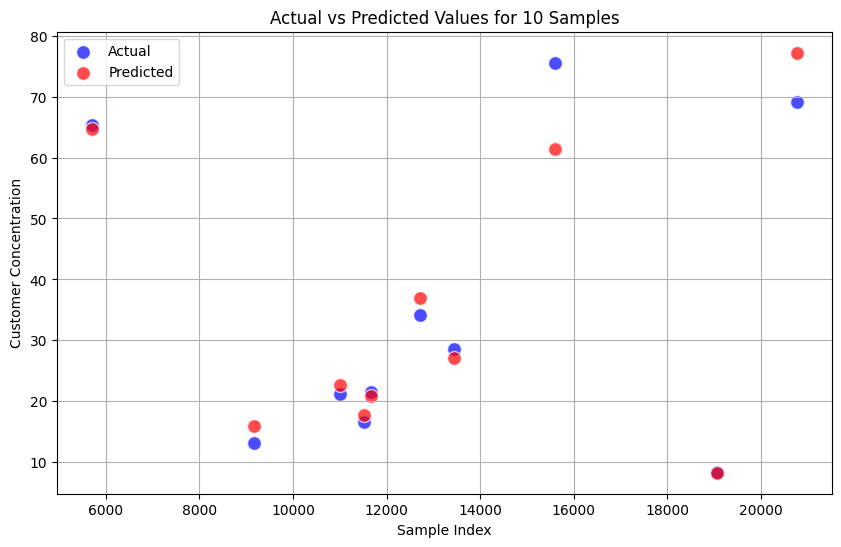

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the model is already trained
# forest_model = RandomForestRegressor(...)

# Select or generate 10 samples for prediction
# For example, using the first 10 samples of X_test:
X_test_sample = X_test[:10]
y_test_sample = y_test[:10]  # Corresponding actual values

# Make predictions on these 10 samples
y_pred_sample = forest_model.predict(X_test_sample)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test_sample,
    'Predicted': y_pred_sample
})

# Display the DataFrame
print(comparison_df)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))

# Plotting Actual values
plt.scatter(comparison_df.index, comparison_df['Actual'], color='b', label='Actual', s=100, edgecolor='w', alpha=0.7)

# Plotting Predicted values
plt.scatter(comparison_df.index, comparison_df['Predicted'], color='r', label='Predicted', s=100, edgecolor='w', alpha=0.7)

# Adding labels and title
plt.title('Actual vs Predicted Values for 10 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Customer Concentration')
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


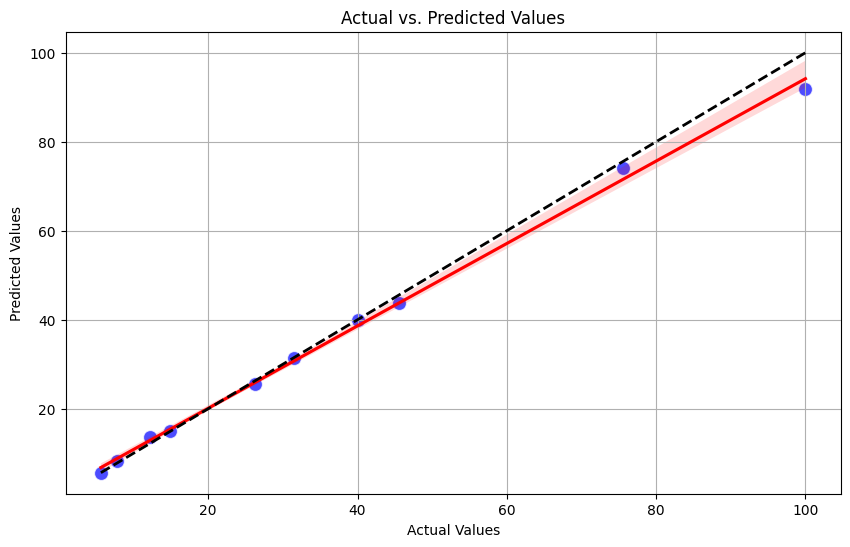

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame from the data
data = {
    'Actual': [40.11, 75.58, 31.49, 14.91, 26.26, 100.00, 7.83, 45.58, 12.25, 5.62],
    'Predicted': [39.82455, 74.03835, 31.40925, 14.90025, 25.66500, 91.80635, 8.16190, 43.77435, 13.59675, 5.61545]
}
df = pd.DataFrame(data)

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df, color='blue', s=100, edgecolor='w', alpha=0.7)

# Add a regression line
sns.regplot(x='Actual', y='Predicted', data=df, scatter=False, color='red')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line for reference
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'k--', lw=2)

# Show the plot
plt.grid(True)
plt.show()


Cross-Validation RMSE Scores: [12.65650323 12.76853978 12.69079755 12.54389946 12.23663844]
Mean Cross-Validation RMSE: 12.579275690868297


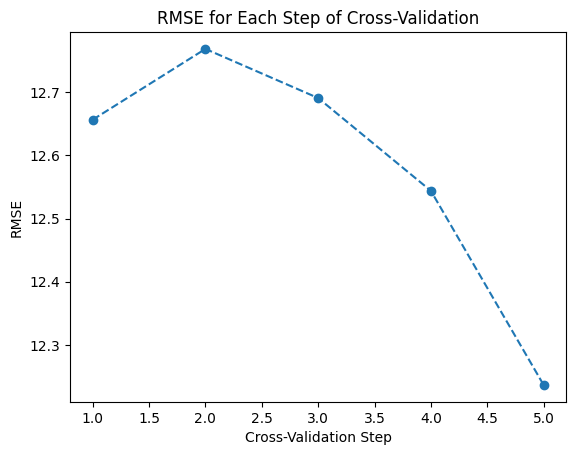

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_test = knn_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 148.22077066831548
Mean Absolute Error: 8.243990566369604


In [ ]:
# Predict on the validation set
y_pred_val = knn_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 146.81478003140234
Validation Mean Absolute Error: 8.089994919666722


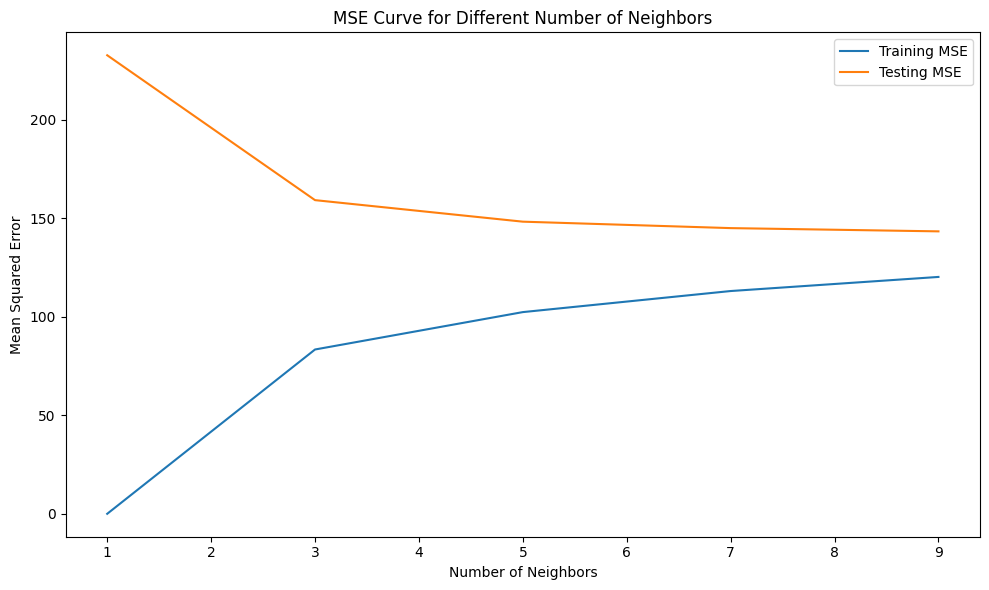

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

num_neighbors = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for k in num_neighbors:
    # Train the KNN regression model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_neighbors, train_errors, label='Training MSE')
plt.plot(num_neighbors, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


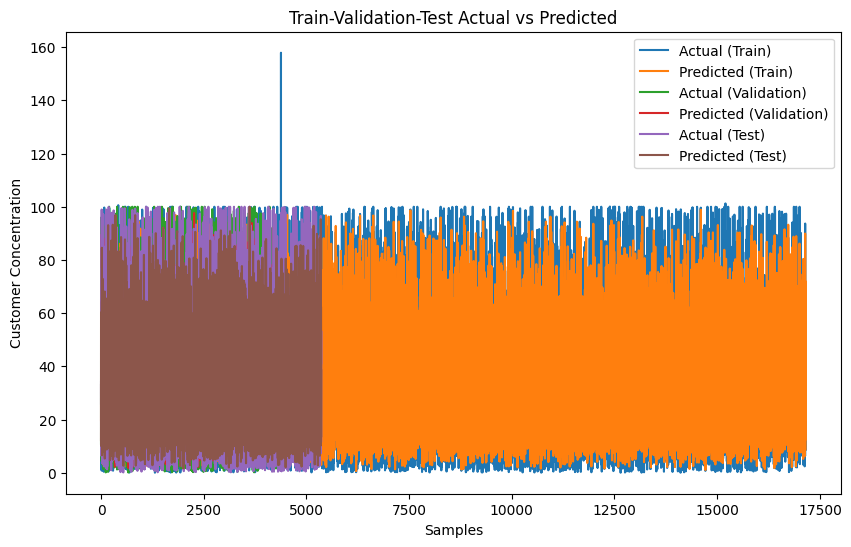

In [ ]:
# Calculate the training set predictions
y_pred_train = knn_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = knn_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = knn_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


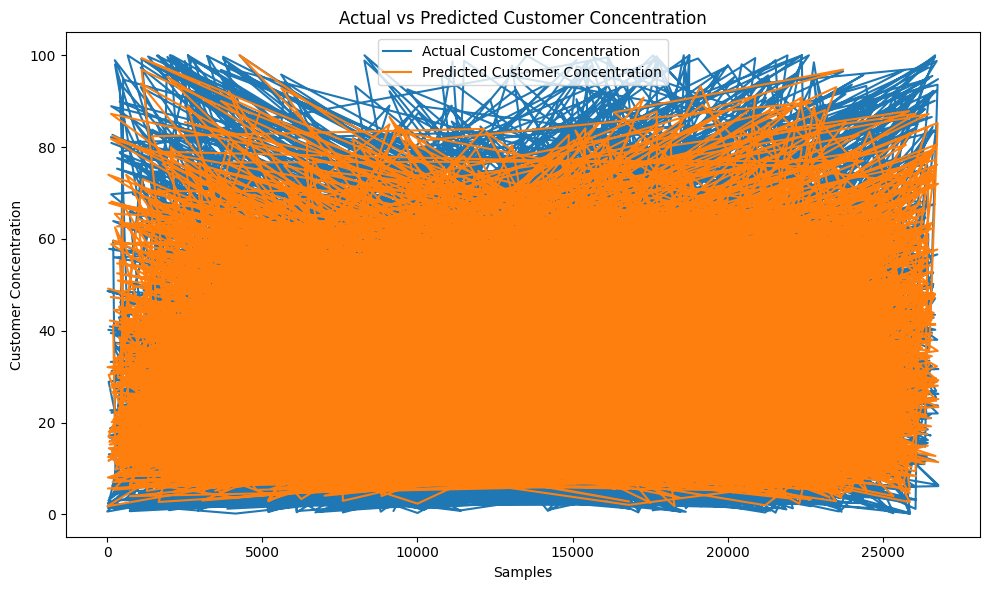

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


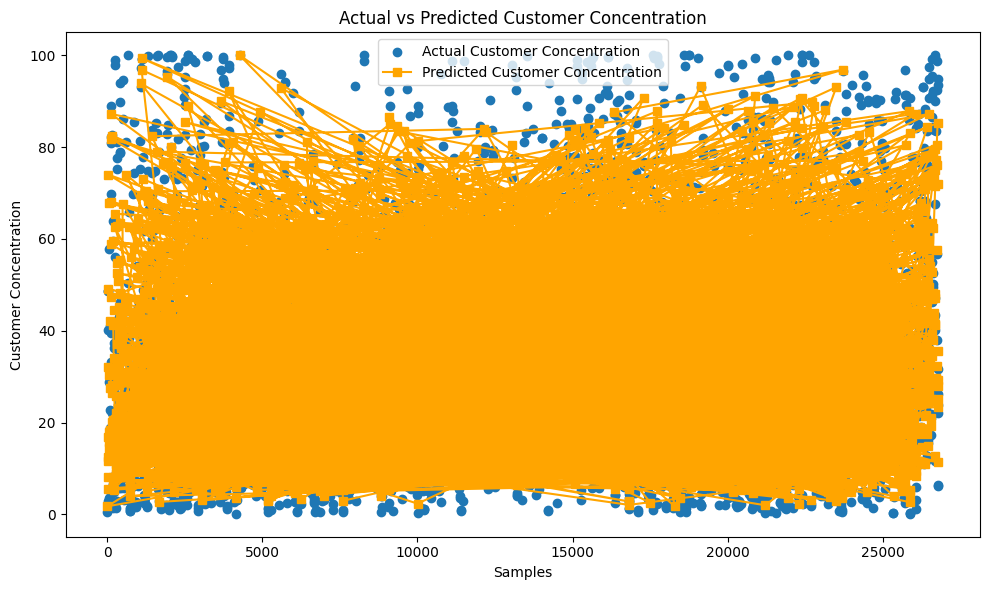

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 8.24
Mean Squared Error (MSE): 148.22
Root Mean Squared Error (RMSE): 12.17
R-squared (R2): 0.72
Root Mean Squared Logarithmic Error (RMSLE): 0.07
Mean Absolute Percentage Error (MAPE): 55.15%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Set hyperparameter values
n_neighbors = 7  # Number of neighbors to consider (you can adjust this)
weights = 'distance'  # Weight points by the inverse of their distance
algorithm = 'auto'  # Algorithm to compute the nearest neighbors
leaf_size = 30  # Leaf size for the BallTree or KDTree
p = 2  # Power parameter for the Minkowski metric (2 for Euclidean distance)

# Create and evaluate a KNN Regression model
knn_model = KNeighborsRegressor(
    n_neighbors=n_neighbors,
    weights=weights,
    algorithm=algorithm,
    leaf_size=leaf_size,
    p=p
)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean(np.log1p(knn_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

print(f"\nKNN Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNN Regression Model:
Mean Absolute Error (MAE): 8.05
Mean Squared Error (MSE): 141.74
Root Mean Squared Error (RMSE): 11.91
R-squared (R2): 0.73
Root Mean Squared Logarithmic Error (RMSLE): 0.08
Mean Absolute Percentage Error (MAPE): 55.00%


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 17152, number of used features: 20
[LightGBM] [Info] Start training from score 32.386966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3937
[LightGBM] [Info] Number of data points in the train set: 13721, number of used features: 20
[LightGBM] [Info] Start training from score 32.467109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3934
[LightGBM] [Info] Number of data points in the train set: 13721, number of used features: 20
[LightGBM] [Info] Start t

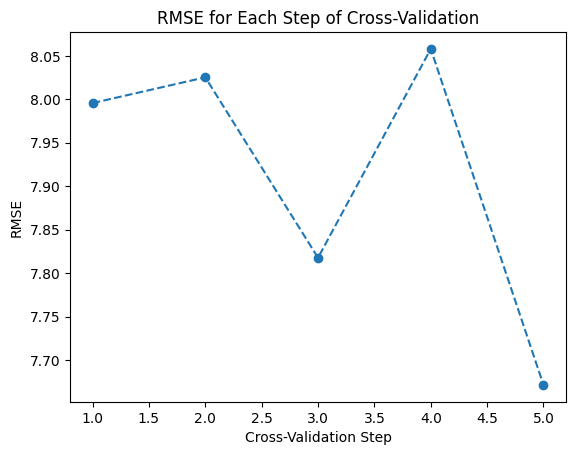

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

cv_scores = cross_val_score(lgbm_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have X_train, X_test, y_train, and y_test defined

lgbm_regressor = LGBMRegressor()  # Initialize LGBMRegressor
lgbm_regressor.fit(X_train, y_train)  # Fit the model

# Predict on the test set
y_pred_test = lgbm_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 17152, number of used features: 20
[LightGBM] [Info] Start training from score 32.386966
Mean Squared Error: 62.57233961597737
Mean Absolute Error: 5.44100774451098


In [ ]:
# Predict on the validation set
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 62.416407467100456
Validation Mean Absolute Error: 5.409272206801532


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 17152, number of used features: 20
[LightGBM] [Info] Start training from score 32.386966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 17152, number of used features: 20
[LightGBM] [Info] Start training from score 32.386966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train s

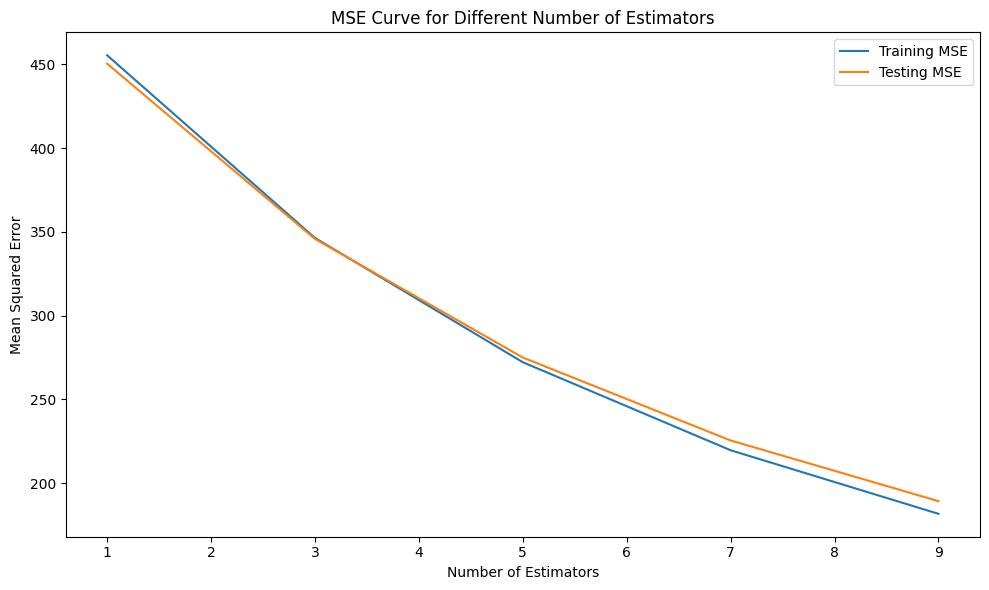

In [ ]:
from lightgbm import LGBMRegressor

num_estimators = [1, 3, 5, 7, 9]
train_errors = []
test_errors = []

for n in num_estimators:
    # Train the LGBM regression model
    model = LGBMRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


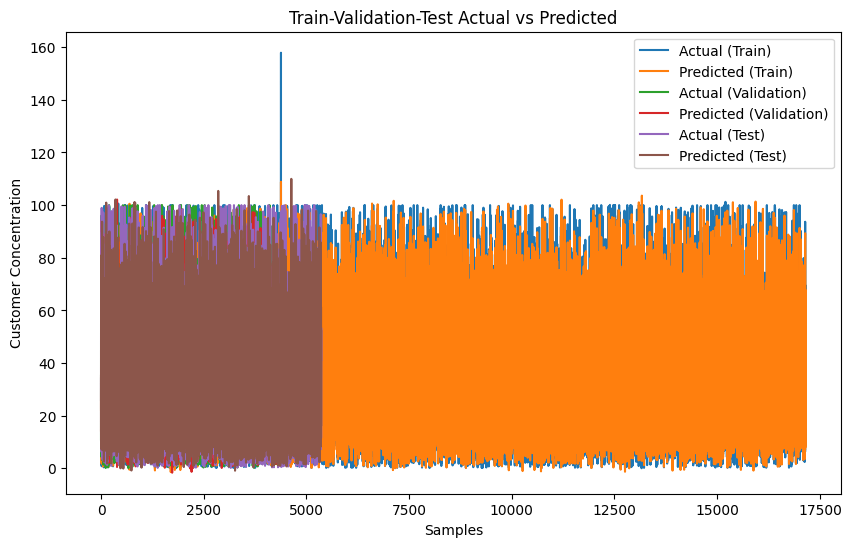

In [ ]:
# Calculate the training set predictions
y_pred_train = lgbm_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = lgbm_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = lgbm_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


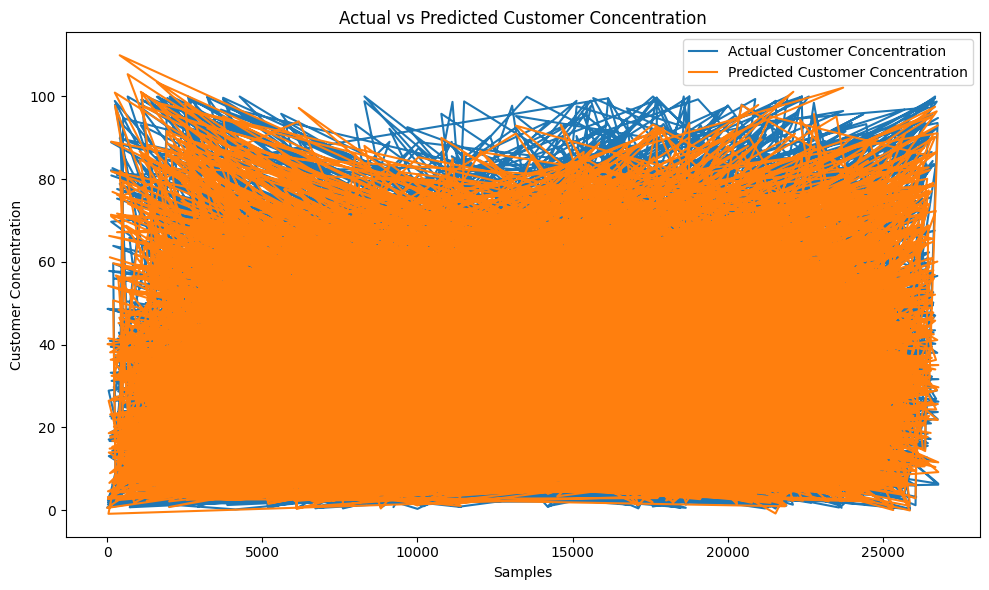

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


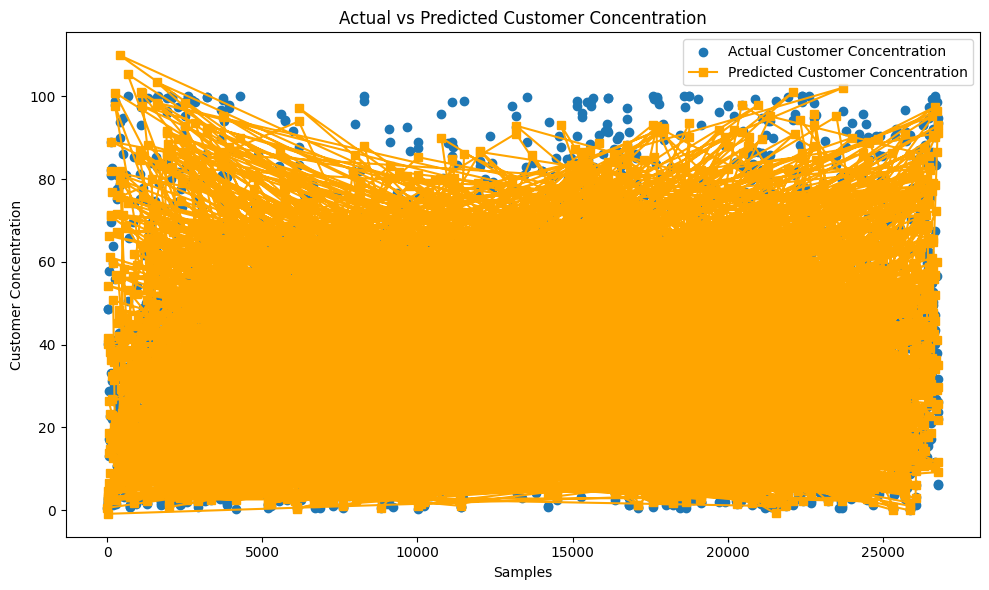

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = lgbm_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate LGBMRegressor model with suboptimal hyperparameters
lgbm_model = LGBMRegressor(
    n_estimators=100,          # Very low number of estimators
    learning_rate=0.1,        # Higher learning rate might make the model less stable
    max_depth=2,              # Restricting tree depth
    num_leaves=5,             # Very low number of leaves
    random_state=42
)

lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

mae = mean_absolute_error(y_test, lgbm_pred)
mse = mean_squared_error(y_test, lgbm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lgbm_pred)
rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lgbm_pred) / y_test)) * 100

print("\nLGBMRegressor Model with Suboptimal Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3954
[LightGBM] [Info] Number of data points in the train set: 17152, number of used features: 20
[LightGBM] [Info] Start training from score 32.386966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<ipython-input-55-3dfdb901bf7b>:21: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.log1p(lgbm_pred) - np.log1p(y_test)) ** 2)


Cross-Validation RMSE Scores: [22.49224556 22.97975943 22.89286182 22.69010683 22.48895321]
Mean Cross-Validation RMSE: 22.708785372353862


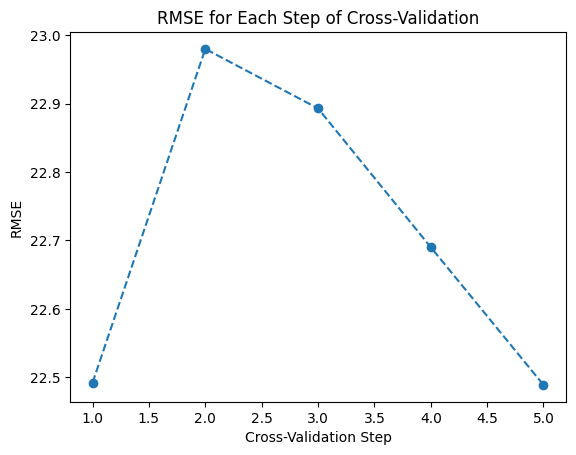

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

In [ ]:
# Assuming X_val and y_val are defined

# Predict on the validation set
y_pred_val = svr_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 494.14063810241254
Validation Mean Absolute Error: 16.485528769596325


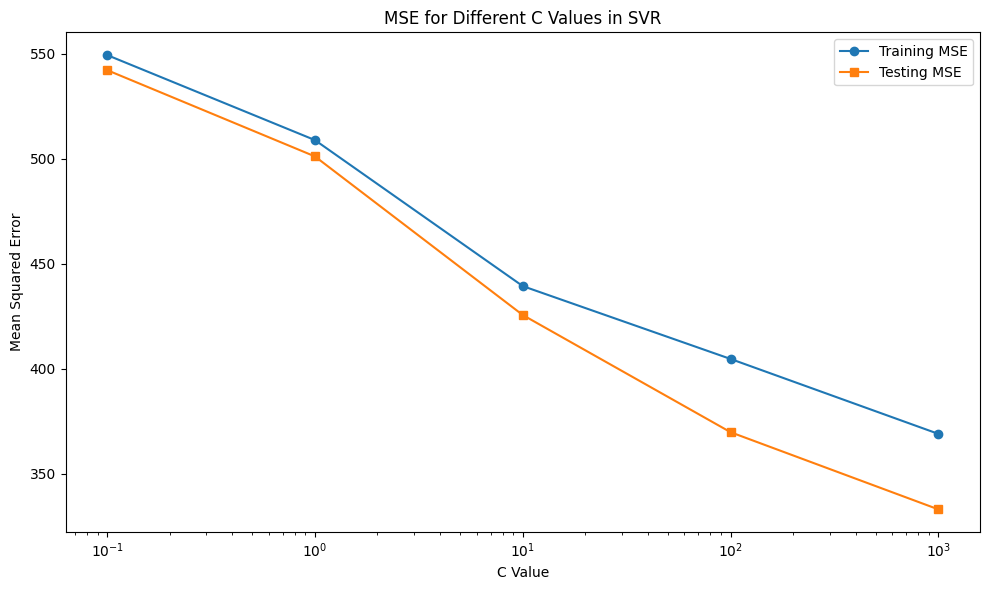

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Instead of num_estimators, we'll use a range of C values for SVR
C_values = [0.1, 1, 10, 100, 1000]
train_errors = []
test_errors = []

for C in C_values:
    # Initialize and train the SVR model with the current C value
    model = SVR(C=C)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and append the mean squared errors for both sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training MSE', marker='o')
plt.plot(C_values, test_errors, label='Testing MSE', marker='s')
plt.title('MSE for Different C Values in SVR')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # C values span several orders of magnitude
plt.legend()
plt.tight_layout()
plt.show()


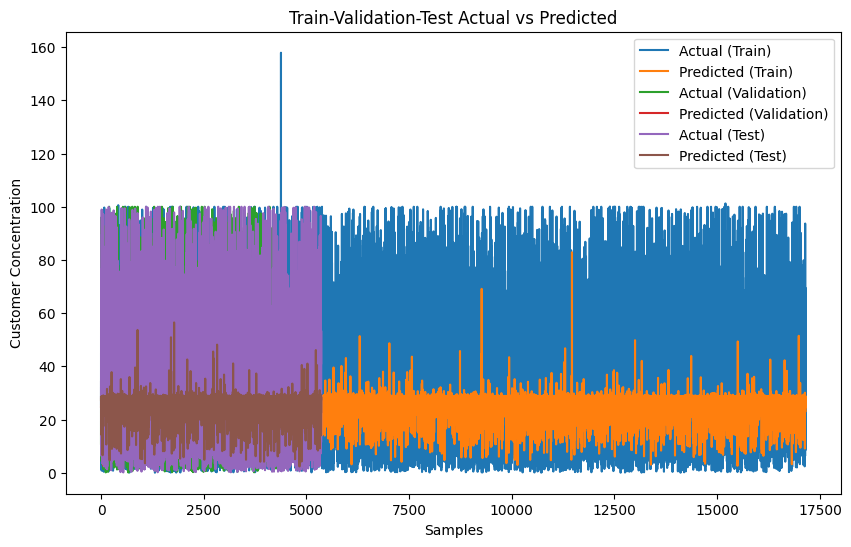

In [ ]:
# Calculate the training set predictions
y_pred_train = svr_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the validation set predictions
y_pred_val = svr_regressor.predict(X_val)

# Calculate the test set predictions
y_pred_test = svr_regressor.predict(X_test)

# Plot the train-validation-test loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test Actual vs Predicted')
plt.legend()
plt.show()


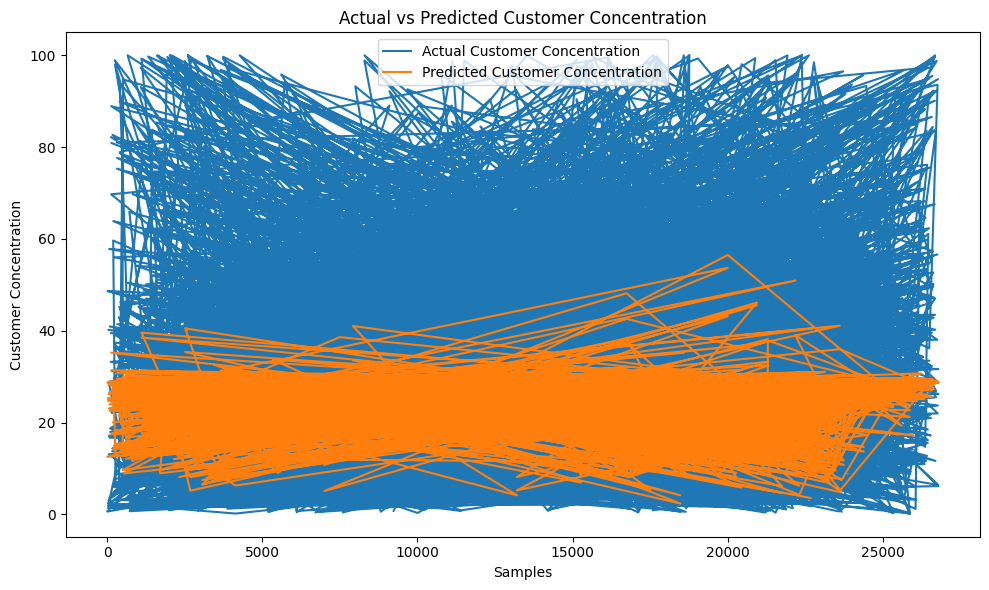

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


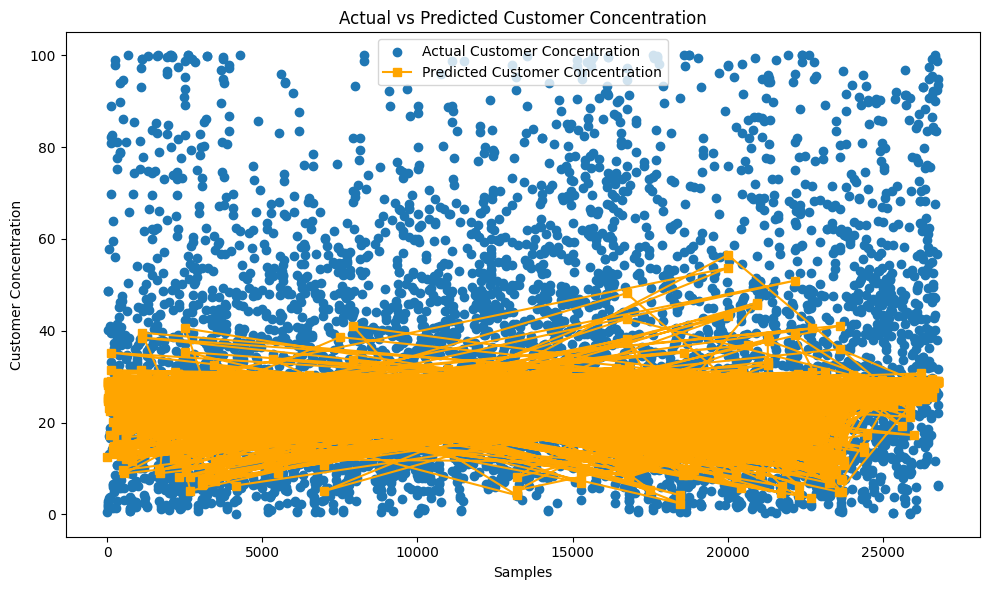

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test)

# Create a DataFrame with actual and predicted rent values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted rent values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean(np.log1p(svr_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

print("\nSVR Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



SVR Model:
Mean Absolute Error (MAE): 16.71
Mean Squared Error (MSE): 501.13
Root Mean Squared Error (RMSE): 22.39
R-squared (R2): 0.04
Root Mean Squared Logarithmic Error (RMSLE): 0.08
Mean Absolute Percentage Error (MAPE): 126.22%


Cross-Validation RMSE Scores: [8.21684936 8.18235551 7.75921313 8.0799643  7.72296418]
Mean Cross-Validation RMSE: 7.992269297318693


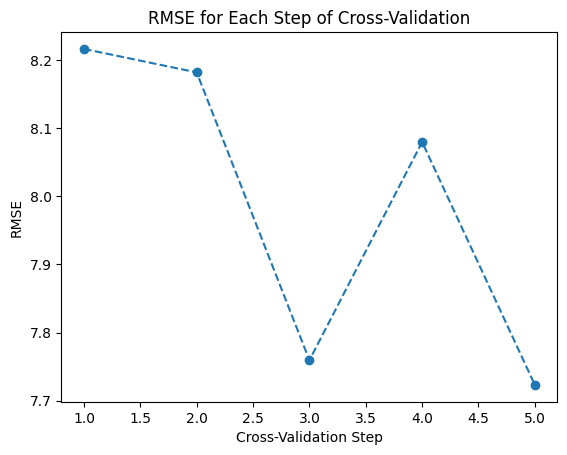

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Perform cross-validation with 5 folds using negative mean squared error as the scoring metric
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE from negative MSE scores
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the test set using the XGBRegressor
y_pred_test = xgb_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 63.17695358995089
Mean Absolute Error: 5.410912155451271


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the validation set using the XGBRegressor
y_pred_val = xgb_regressor.predict(X_val)

# Calculate evaluation metrics for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for the validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)


Validation Mean Squared Error: 64.02339876030916
Validation Mean Absolute Error: 5.453986706371274


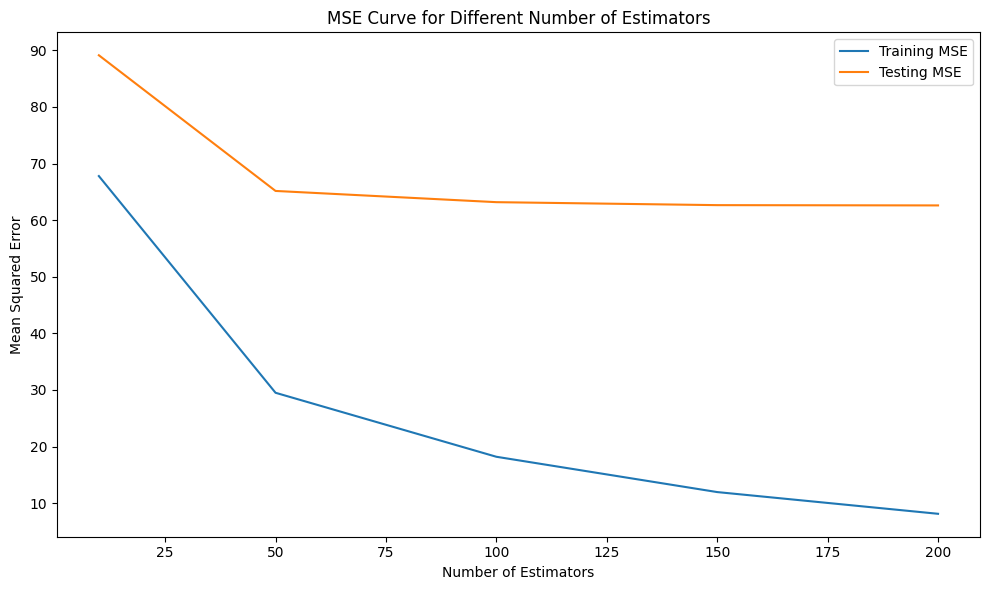

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

for n in num_estimators:
    # Train the XGBRegressor model with different numbers of estimators
    model = xgb.XGBRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


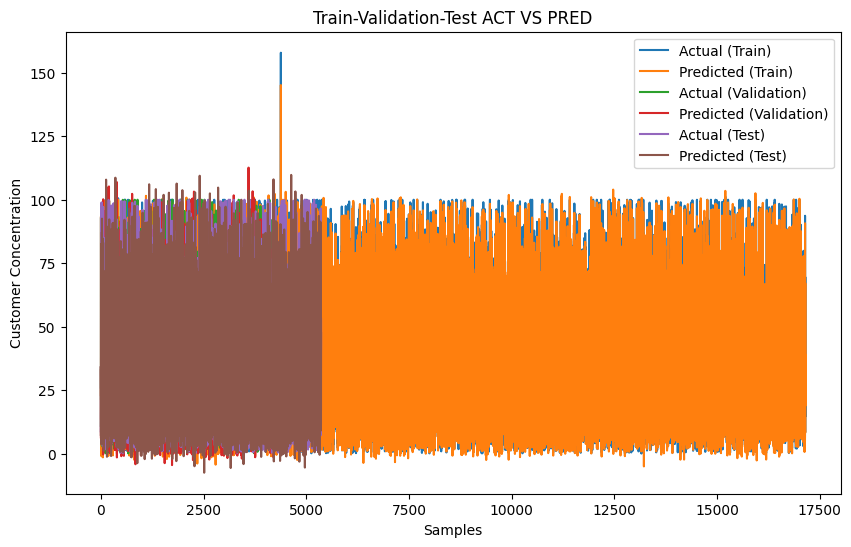

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Calculate the training set predictions
y_pred_train = xgb_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Predict on the validation and test sets
y_pred_val = xgb_regressor.predict(X_val)
y_pred_test = xgb_regressor.predict(X_test)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Customer Concentration')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


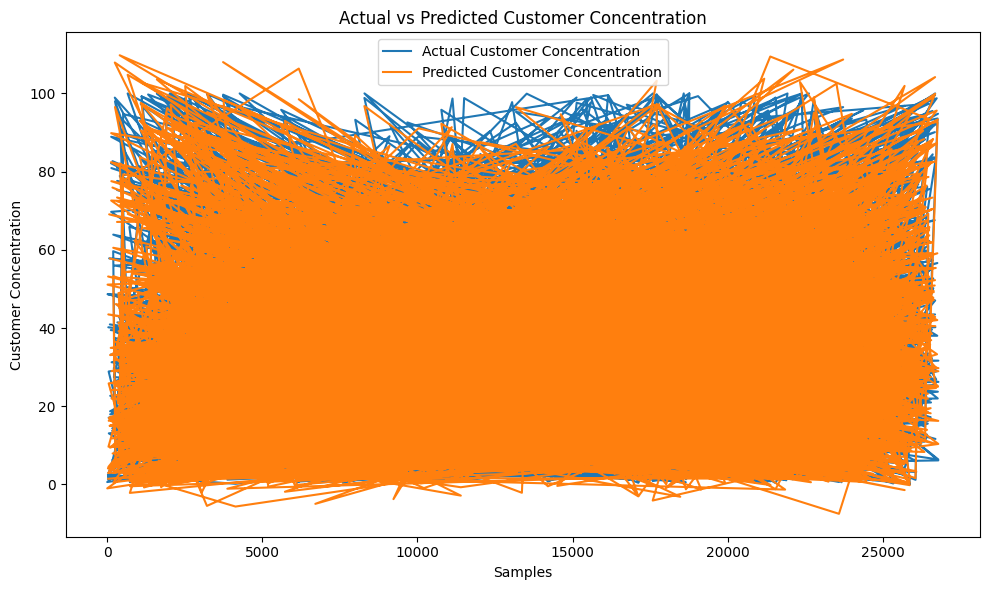

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.plot(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


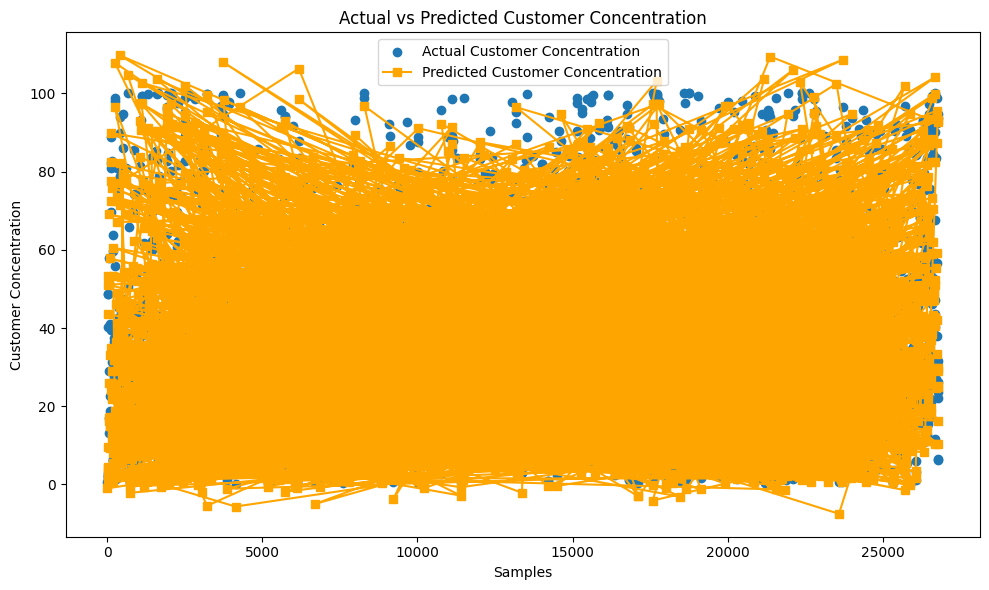

In [ ]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and train the XGBRegressor model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with actual and predicted customer concentration values
rent_comparison = pd.DataFrame({'Actual Customer Concentration': y_test, 'Predicted Customer Concentration': y_pred})

# Plot the actual versus predicted customer concentration values
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted Customer Concentration")
plt.scatter(rent_comparison.index, rent_comparison['Actual Customer Concentration'], label='Actual Customer Concentration', marker='o')
plt.plot(rent_comparison.index, rent_comparison['Predicted Customer Concentration'], label='Predicted Customer Concentration', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Customer Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate XGBRegressor with additional hyperparameters
xgb_model = xgb.XGBRegressor(
    n_estimators=num_estimators,
    learning_rate=0.05,  # Controls the step size for each boosting step
    max_depth=6,  # Maximum depth of a tree, increasing this can lead to overfitting
    min_child_weight=1,  # Minimum sum of instance weight needed in a child
    subsample=0.8,  # Subsample ratio of the training instances
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)
rmsle = np.sqrt(np.mean(np.log1p(xgb_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - xgb_pred) / y_test)) * 100

print(f"\nXGBRegressor Model with {num_estimators} Estimators and Tuned Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



XGBRegressor Model with 100 Estimators and Tuned Hyperparameters:
Mean Absolute Error (MAE): 5.77
Mean Squared Error (MSE): 68.65
Root Mean Squared Error (RMSE): 8.29
R-squared (R2): 0.87
Root Mean Squared Logarithmic Error (RMSLE): 0.06
Mean Absolute Percentage Error (MAPE): 30.08%
